In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# loading and investigation of the data
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
# exploratory analysis
trends = df.corr()
trends['Ranking'].sort_values()

Winnings                     -0.359835
BreakPointsOpportunities     -0.334548
ServiceGamesPlayed           -0.331738
ReturnGamesPlayed            -0.331478
BreakPointsFaced             -0.322082
DoubleFaults                 -0.305866
Losses                       -0.300614
Wins                         -0.287018
Aces                         -0.277811
TotalPointsWon               -0.272007
TotalServicePointsWon        -0.208355
ReturnPointsWon              -0.202597
ServiceGamesWon              -0.198822
ReturnGamesWon               -0.191280
SecondServePointsWon         -0.181013
FirstServeReturnPointsWon    -0.178664
SecondServeReturnPointsWon   -0.159592
FirstServePointsWon          -0.150004
BreakPointsSaved             -0.121220
FirstServe                   -0.068759
BreakPointsConverted         -0.051005
Year                         -0.040483
Ranking                       1.000000
Name: Ranking, dtype: float64

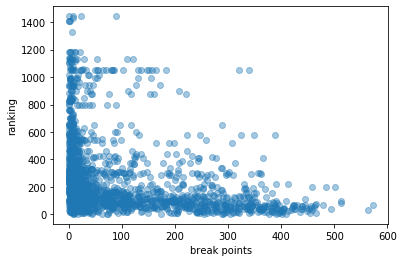

In [4]:
# scatterplot of breakpoint opportunities against ranking
plt.scatter(df['BreakPointsOpportunities'], df['Ranking'], alpha = 0.4)
plt.xlabel('break points')
plt.ylabel('ranking')
plt.show()

In [5]:
trends['Winnings'].sort_values()

Ranking                      -0.359835
Year                          0.043908
FirstServe                    0.057882
BreakPointsConverted          0.075022
SecondServeReturnPointsWon    0.199401
FirstServeReturnPointsWon     0.240808
BreakPointsSaved              0.258271
ReturnPointsWon               0.271646
ReturnGamesWon                0.279645
SecondServePointsWon          0.281215
FirstServePointsWon           0.361121
ServiceGamesWon               0.395577
TotalServicePointsWon         0.407707
TotalPointsWon                0.461061
Aces                          0.798404
DoubleFaults                  0.854685
Losses                        0.869277
BreakPointsFaced              0.876036
BreakPointsOpportunities      0.900444
ReturnGamesPlayed             0.912613
ServiceGamesPlayed            0.912985
Wins                          0.913297
Winnings                      1.000000
Name: Winnings, dtype: float64

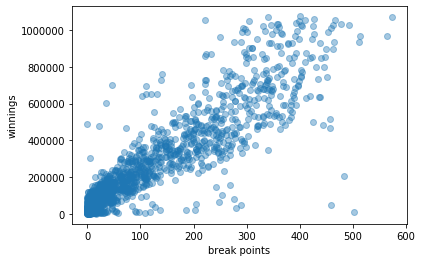

In [6]:
# scatterplot of breakpoint opportunities against winnings
plt.scatter(df['BreakPointsOpportunities'], df['Winnings'], alpha = 0.4)
plt.xlabel('break points')
plt.ylabel('winnings')
plt.show()

In [7]:
## single feature linear regression

# establishing variables
features = df[['BreakPointsOpportunities']]
outcome = df[['Winnings']]

In [8]:
# train test split
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [9]:
# creating and fitting the model
model = LinearRegression()
model.fit(features_train,outcome_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# scoring the model
model.score(features_test,outcome_test)

0.8195073228637999

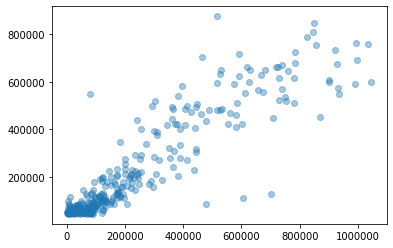

In [11]:
# predicting a player's winnings based on break points opportunities
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)

In [12]:
## two feature linear regression

# establishing variables
features = df[['Aces', 'BreakPointsOpportunities']]
outcome = df[['Winnings']]

In [13]:
# train test split
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [14]:
# creating and fitting the model
model = LinearRegression()
model.fit(features_train,outcome_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# scoring the model
model.score(features_test,outcome_test)

0.8055545438853109

Text(0, 0.5, 'Actual Winnings')

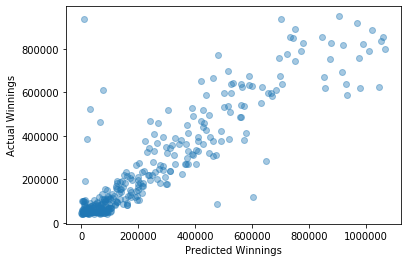

In [16]:
# Predicting winnings based on aces and break points opportunities
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.xlabel('Predicted Winnings')
plt.ylabel('Actual Winnings')

In [17]:
## multiple feature linear regression

# establishing variables
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

In [18]:
# train test split
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [19]:
# creating and fitting the model
model = LinearRegression()
model.fit(features_test, outcome_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# scoring the model
model.score(features_test, outcome_test)

0.8782180535020202

Text(0, 0.5, 'Actual Winnings')

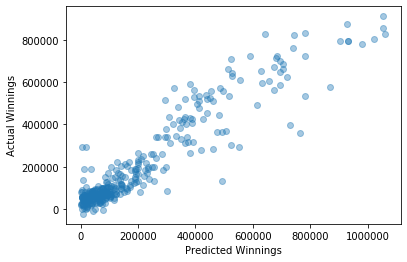

In [21]:
# predicting a player's winnings based on the feature variables
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha=0.4)
plt.xlabel('Predicted Winnings')
plt.ylabel('Actual Winnings')